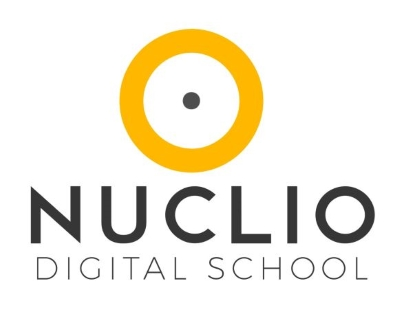

# Pandas

Temos vindo a falar de Pandas. Vamos rever alguns conceitos...

**Pandas é uma biblioteca de código aberto em Python dedicada à análise de dados.**

Com Pandas, Python passou a ser uma escolha preferencial, substituindo R, SQL ou Excel.

In [2]:
import pandas as pd
import numpy as np

Com Pandas temos acesso a duas novas estruturas de dados:
- Series
- DataFrames

![title](https://storage.googleapis.com/lds-media/images/series-and-dataframe.width-1200.png)

# Pandas Dataframes

Um DataFrame consiste numa tabela bidimensional, que poderá conter dados heterogeneos, com eixos rotulados (linhas e colunas).




**Propriedades dos DataFrames:**
   - as suas colunas podem conter diferentes tipos de dados
   - os seus elementos são mutáveis
   - o seu tamanho é modificável
   - os seus eixos são rotulados
   - podemos executar operações aritméticas tanto nas suas linhas como colunas

Deste modo, os Pandas DataFrames consistem essencialmente em três elementos:
- dados (*data*)
- linhas (*rows*)
- colunas (*columns*)



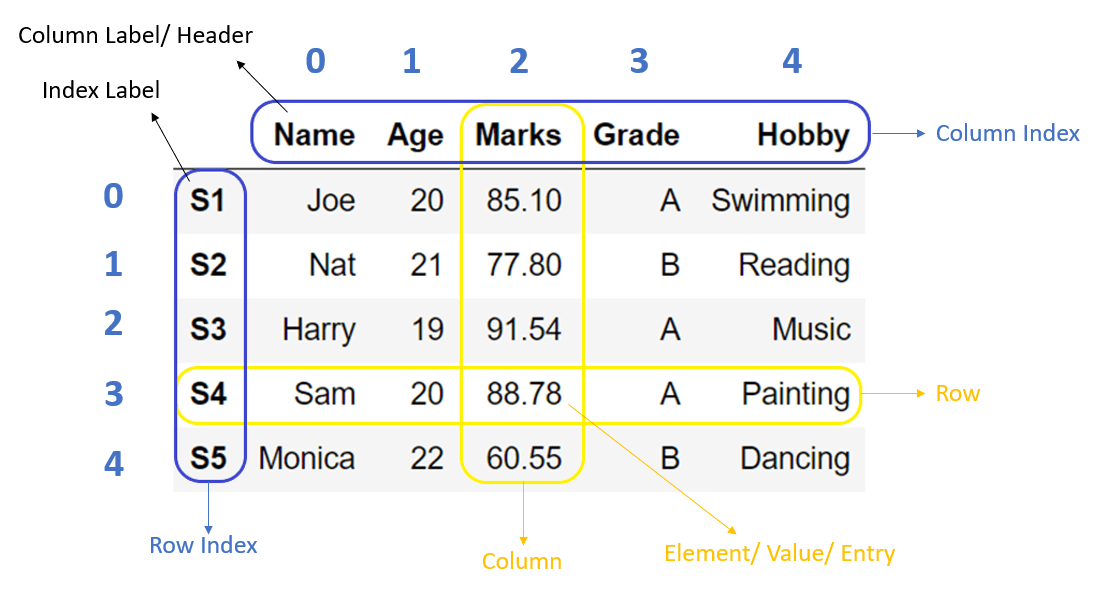

Conseguimos criar um DataFrame usando o seguinte construtor:



**df = pd.DataFrame( data, index, columns, dtype, copy)**

| Parâmetro | Descrição |
|:-------- |:------------ |
| **data** | Dados inseridos como argumento podem ter várias formas, como por exemplo: *ndarray*, *series*, *list*, *dict*, ou outros dataframes
| **index** | Por ser uma estrutura 2-d, tanto as linhas(rows) como as colunas têm etiquetas |
| **columns** | As etiquetas das colunas são predefinidas para *np.arange(n)* se não especificado outra forma de indexação |
| **dtype** | Tipo de dados da coluna |

**Nota:** Podemos nomear os nossos dataframes da forma que quisermos. Contudo, existe uma notação recomendada, em que os nomes são derivados da sigla **d**ata **f**rame: df, df1, df2 etc.

### Tipos de dados - dtype( )

Pandas DataFrames suportam os seguintes tipos de dados:







![title](https://pbpython.com/images/pandas_dtypes.png)

## Como criar um DataFrame

Um DataFrame pode ser criado com diferentes tipos e dados:
- istas
- Dicionários
- Pandas Series
- Numpy *ndarrays*
- Outros Pandas DataFrames

### Criar um DataFrame vazio

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


Neste caso, e como podem ver, não temos nem colunas nem linhas. **Ou seja, temos um DataFrame completamente vazio.**

### Criar um DataFrame a partir de uma lista

In [ ]:
#Lista 1D
list_data = ['one','two','three','four','five','six']
df = pd.DataFrame(data=list_data)
df

,0
0,one
1,two
2,three
3,four
4,five
5,six


Neste exemplo, como os nossos **dados são uma lista**, o dataframe apenas contém uma única coluna.

Como não especificámos o nome da coluna, a mesma adotou como nome o seu índice.

In [ ]:
#Lista 2D
list_of_lists = [["Abc",25], ["Def", 35] , ["Ghi", 14], ["Marcius", 30]]

In [ ]:
df_2 = pd.DataFrame(data = list_of_lists)

In [ ]:
df_2

,0,1
0,Abc,25
1,Def,35
2,Ghi,14
3,Marcius,30


Neste caso, uma vez que a lista tem duas dimensões, o dataframe aloca os elementos em 2 colunas com tantos elementos quanto as listas dentro do objeto inicial.

Analisando os dados deste dataframe, verificámos que a primeira coluna poderá conter nomes, enquanto a segunda poderá conter idades.

Podemos então, com base nesta análise, atribuir nomes às colunas.

Para tal, basta basta passar uma **lista de nomes** como parâmetro *columns* do DataFrame.

In [ ]:
#Exemplo com nomes, idades e países
list_of_lists = [["Abc",25, 'Brazil'], ["Def", 35, 'Brazil'] , ["Ghi", 14,'Brazil'], ["Marcius", 30, 'Espanha']]
column_names = ['Name','Age','Country']

In [ ]:
df = pd.DataFrame(data=list_of_lists, columns=column_names)
df

,Name,Age,Country
0,Abc,25,Brazil
1,Def,35,Brazil
2,Ghi,14,Brazil
3,Marcius,30,Espanha


Ao criar um DataFrame, devemos ter em mente as seguintes considerações:
- todos os *ndarrays* devem ter o mesmo comprimento
- se especificarmos uma rotulagem, o comprimento do índice deve ser equivalente ao comprimento das matrizes
- se um índice não for especificado, por padrão a indexação será **range(n)**, onde **n** = comprimento do array

In [ ]:
#Sem rótulos
list_of_lists = [ ['A', 'B', 'C', 'D'] , [28,34,29,42] ]

In [ ]:
df = pd.DataFrame(data = list_of_lists)
df

,0,1,2,3
0,A,B,C,D
1,28,34,29,42


#### Outros parâmetros de um DataFrame

Podemos ainda definir **nomes para linhas** e um determinado **tipo de dados** no nosso DataFrame através dos parâmetros *index* e *dtype*.

In [ ]:
list_of_lists = [["Abc",25], ["Def", 35] , ["Ghi", 14]]

column_names = ['Name','Age']

row_names = ['Student 1', 'Student 2', 'Student 3']

In [ ]:
df = pd.DataFrame(data = list_of_lists, columns = column_names, index = row_names)
df

,Name,Age
Student 1,Abc,25
Student 2,Def,35
Student 3,Ghi,14


In [ ]:
# Sem parametro dtype
df2 = pd.DataFrame(data = list_of_lists, columns = column_names, index = row_names)
df2

,Name,Age
Student 1,Abc,25
Student 2,Def,35
Student 3,Ghi,14


### Criar um DataFrame a partir de um dicionário de listas



In [ ]:
dict_of_lists = {"names": ['A', 'B', 'C'] , "age": [28,34,0]}

In [ ]:
type(dict_of_lists)

dict

In [ ]:
df3 = pd.DataFrame(data = dict_of_lists)
df3

,names,age
0,A,28
1,B,34
2,C,0
3,D,30


In [ ]:
df2 = pd.DataFrame.from_dict(data = dict_of_lists)
df2

,names,age
0,A,28
1,B,34
2,C,0


In [ ]:
len(df2)

3

In [ ]:
type(df2)

pandas.core.frame.DataFrame

Como podem ver, o nome de cada item no dicionário torna-se o nome de cada coluna. No entanto, as linhas não têm um rótulo atribuido.

In [ ]:
row_names = ["S 1", "S 2", "S 3","S 4"]

In [ ]:
# verificar se temos o mesmo número de linhas e rótulos de linha
len(row_names) == len(dict_of_lists['names'])


False

In [ ]:
df = pd.DataFrame(dict_of_lists, index = row_names)
df

,names,age
S 1,A,28
S 2,B,34
S 3,C,0


### Criar um DataFrame a partir de uma lista de dicionários

Também conseguimos criar um DataFrame através de uma lista de dicionários.

**As chaves (keys) do dicionário serão usadas por padrão como nomes das colunas.**



In [ ]:
list_dicts = [ {'a': 1, 'b': 2,}, {'a': 5, 'b': 10, 'c': 20}]
list_dicts

[{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]

In [ ]:
df3 = pd.DataFrame( data = list_dicts)
df3

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [ ]:
list_dicts[1]

{'a': 5, 'b': 10, 'c': 20}

Reparem que:
- uma lista com *2* elementos dá origem a um DataFrame de *2* linhas
- tal como acontece com as Pandas Series, os DataFrames são autocompletados. Isto é, caso as dimensões dos elementos que colidem no Dataframe não sejam compatíveis, ao invés de gerar um erro, são geradas quantas linhas ou colunas forem necessárias, conforme uma operação union() e são preenchidos com nulos quando apropriado

In [ ]:
data = [{'a': 2, 'b': 3, 'c': 4, 'd': 1},{'a': 1, 'd': 2, 'e': 3, 'b': 1}]
df = pd.DataFrame(data)
df.columns

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [ ]:
df = pd.DataFrame(data, index=['first', 'second'])
df

,a,b,c,d,e
first,2,3,4.0,1,NaN
second,1,1,NaN,2,3.0


### Indexar um DataFrame (.index e .columns)

In [3]:
dict_people = {'names':['A', 'B', 'C', 'D'],'age':[28,34,29,42],'city':['Barcelona',"Madrid","Valencia","Malaga"], "siblings":[1,2,3,0]}

df = pd.DataFrame(dict_people, index=["S 1","S 2","S 3","S 4"])
df

,names,age,city,siblings
S 1,A,28,Barcelona,1
S 2,B,34,Madrid,2
S 3,C,29,Valencia,3
S 4,D,42,Malaga,0


In [4]:
df.index

Index(['S 1', 'S 2', 'S 3', 'S 4'], dtype='object')

In [5]:
df.columns

Index(['names', 'age', 'city', 'siblings'], dtype='object')

Se quisermos alterar os rótulos das linhas ou colunas de um dataframe, basta usarmos as suas propriedades **.index** e **.columns**

In [6]:
df.index = ["Prof1","Prof2","Prof3","Prof4"]

In [7]:
display(df)

,names,age,city,siblings
Prof1,A,28,Barcelona,1
Prof2,B,34,Madrid,2
Prof3,C,29,Valencia,3
Prof4,D,42,Malaga,0


In [8]:
df.columns = ["N","M","C","H"]

In [9]:
df

,N,M,C,H
Prof1,A,28,Barcelona,1
Prof2,B,34,Madrid,2
Prof3,C,29,Valencia,3
Prof4,D,42,Malaga,0


Podemos através dos seus rótulos escolher as colunas e linhas que queremos incluir no nosso dataframe:



In [11]:
df2 = pd.DataFrame(df, index=['Prof1', 'Prof2'], columns=['N', 'C'])
df2

,N,C
Prof1,A,Barcelona
Prof2,B,Madrid



## Explorar DataFrames

### Atributos de um DataFrame

| Atributo | Descrição |
|:-------- |:---------- |
| **dtypes** | Lista todos os tipos de dados nas colunas do dataframe |
| **columns** | Lista o nome das colunas |
| **axes** | Lista rótulos de linha e nomes de coluna |
| **ndim** | Retorna o número de dimensões do dataframe |
| **size** | Retorna o número de elementos do dataframe |
| **shape** | Retorna um tuple representando as dimensões do dataframe (*linhas* x *colunas*) |
| **values** | Retorna a representação NumPy dos dados |

In [ ]:
d = {'one' : pd.Series([10, 12, 3], index=[10, 12, 3]),
   'two' : pd.Series([15.0, 2.0, 4.0], index=[10, 12, 3])}

In [ ]:
df = pd.DataFrame(d)
df

,one,two
3,NaN,4.0
10,10.0,15.0
12,12.0,2.0
test,3.0,NaN


In [ ]:
df.dtypes

one      int64
two    float64
dtype: object

In [ ]:
df.index

Int64Index([10, 12, 3], dtype='int64')

In [ ]:
df.columns

Index(['one', 'two'], dtype='object')

In [ ]:
df.axes

[Index([3, 10, 12, 'test'], dtype='object'),
 Index(['one', 'two'], dtype='object')]

In [ ]:
df.ndim

2

In [ ]:
df.size

6

In [ ]:
df.shape

(3, 2)

In [ ]:
df.values

array([[10., 15.],
       [12.,  2.],
       [ 3.,  4.]])

### Métodos de um DataFrame

In [ ]:
dir(pd.core.frame.DataFrame) # para saber quais são os métodos incluídos num dataframe

['T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmo

| Método | Descrição |
|:------ |:---------- |
| **info()** | Retorna as informações básicas sobre o df |
| **head(n)** | Lista as primeiras *n* linhas |
| **tail(n)** | Lista as últimas *n* linhas |
| **describe()** | Gera algumas métricas estatísticas descritivas do dataframe, apenas para colunas numéricas |
| **max()** | Retorna o valor máximo de cada coluna numérica |
| **min()** | Retorna o valor mínimo de cada coluna numérica |
| **std()** | Retorna o desvio padrão de cada coluna numérica |
| **sample(n)** | Retorna um conjunto aleatório do dataframe |
| **dropna()** | Remove todos os elementos com valores nulos |

In [ ]:
rows = ['Student1', 'Student2', 'Student3', 'Student4','Student5']
df_2 = pd.DataFrame(data=dict_people, index=rows)

In [ ]:
df_2

,names,age,city,siblings
Student1,A,28,Barcelona,1
Student2,B,34,Madrid,2
Student3,C,29,Valencia,3
Student4,D,42,Malaga,0
Student5,E,22,Barcelona,2


In [ ]:
df_2.index = ['name1', 'name2', 'name3', 'name4', 'name5']

In [ ]:
df_2

,names,age,city,siblings
name1,A,28,Barcelona,1
name2,B,34,Madrid,2
name3,C,29,Valencia,3
name4,D,42,Malaga,0
name5,E,22,Barcelona,2


In [ ]:
df_2.describe(include='all')

,names,age,city,siblings
count,5,5.000000,5,5.000000
unique,5,NaN,4,NaN
top,A,NaN,Barcelona,NaN
freq,1,NaN,2,NaN
mean,NaN,31.000000,NaN,1.600000
std,NaN,7.483315,NaN,1.140175
min,NaN,22.000000,NaN,0.000000
25%,NaN,28.000000,NaN,1.000000
50%,NaN,29.000000,NaN,2.000000
75%,NaN,34.000000,NaN,2.000000


In [ ]:
df_2.head(n=2)

,names,age,city,siblings
name1,A,28,Barcelona,1
name2,B,34,Madrid,2


In [ ]:
df_2.tail(n=2)

,names,age,city,siblings
name4,D,42,Malaga,0
name5,E,22,Barcelona,2


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, name1 to name5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   names     5 non-null      object
 1   age       5 non-null      int64 
 2   city      5 non-null      object
 3   siblings  5 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 200.0+ bytes


In [ ]:
df_2.memory_usage()

Index       40
names       40
age         40
city        40
siblings    40
dtype: int64

In [ ]:
# seleciona um conjunto de valores de amostra aleatória do quadro de dados
# n é o número de amostras a serem selecionadas
# definir random_state é o mesmo que definir uma semente
# replace = True permite que uma única linha seja escolhida mais de uma vez ao criar a amostra
df_2.sample(n=14, random_state=10, replace=True)

,names,age,city,siblings
name2,B,34,Madrid,2
name5,E,22,Barcelona,2
name1,A,28,Barcelona,1
name2,B,34,Madrid,2
name4,D,42,Malaga,0
name5,E,22,Barcelona,2
name2,B,34,Madrid,2
name1,A,28,Barcelona,1
name2,B,34,Madrid,2
name3,C,29,Valencia,3


### Transpôr um DataFrame - .T property

Por vezes, um dataframe pode ser mais simples de analisar se o transpusermos primeiro.

In [ ]:
df_2

,names,age,city,siblings
name1,A,28,Barcelona,1
name2,B,34,Madrid,2
name3,C,29,Valencia,3
name4,D,42,Malaga,0


In [ ]:
df_2.T

,name1,name2,name3,name4
names,A,B,C,D
age,28,34,29,42
city,Barcelona,Madrid,Valencia,Malaga
siblings,1,2,3,0


### Ordenar um DataFrame - sort_index(), sort_values()

#### Ordenar por índices - df.sort_index()

In [ ]:
dict_cars = {'price': [22000,25000,27000,35000],
            'brand': ['Honda Civic','Toyota Corolla','Ford Focus','Audi A4'],
            'year': [2015,2013,2018,2018]
        }
df = pd.DataFrame(dict_cars)
df

,price,brand,year
0,22000,Honda Civic,2015
1,25000,Toyota Corolla,2013
2,27000,Ford Focus,2018
3,35000,Audi A4,2018


##### Ordenar por colunas- axis = 1


Ordenar as colunas da esquerda para a direita de acordo com os nomes das colunas:



In [ ]:
df.sort_index(axis = 1)

,brand,price,year
0,Honda Civic,22000,2015
1,Toyota Corolla,25000,2013
2,Ford Focus,27000,2018
3,Audi A4,35000,2018


In [ ]:
df.sort_index(axis = 1, ascending=False)

,year,price,brand
0,2015,22000,Honda Civic
1,2013,25000,Toyota Corolla
2,2018,27000,Ford Focus
3,2018,35000,Audi A4


##### Ordenar por linhas - axis=0

Ordenar as linhas de cima para baixo de acordo com os nomes das linhas:

In [ ]:
df.sort_index(axis=0)

,price,brand,year
0,22000,Honda Civic,2015
1,25000,Toyota Corolla,2013
2,27000,Ford Focus,2018
3,35000,Audi A4,2018


In [ ]:
df.sort_index(axis=0,ascending=False)

,price,brand,year
3,35000,Audi A4,2018
2,27000,Ford Focus,2018
1,25000,Toyota Corolla,2013
0,22000,Honda Civic,2015


#### Ordenar por valores - df.sort_values()

In [ ]:
df

,price,brand,year
0,22000,Honda Civic,2015
1,25000,Toyota Corolla,2013
2,27000,Ford Focus,2018
3,35000,Audi A4,2018


In [ ]:
df.sort_values(by=['price'])

,price,brand,year
0,22000,Honda Civic,2015
1,25000,Toyota Corolla,2013
2,27000,Ford Focus,2018
3,35000,Audi A4,2018


In [ ]:
df.sort_values(by=['year'], ascending = False)

,price,brand,year
1,25000,Toyota Corolla,2013
0,22000,Honda Civic,2015
2,27000,Ford Focus,2018
3,35000,Audi A4,2018


##### Ordenar usando vários campos

In [ ]:
df.sort_values(by=['brand'])

,brand,price,year
3,Audi A4,35000,2018
2,Ford Focus,27000,2018
0,Honda Civic,22000,2015
1,Toyota Corolla,25000,2013


In [ ]:
df.sort_values(by=['price','year'])

,price,brand,year
0,22000,Honda Civic,2015
1,25000,Toyota Corolla,2013
2,27000,Ford Focus,2018
3,35000,Audi A4,2018


In [ ]:
df.sort_values(by=['year','price'])

,price,brand,year
1,25000,Toyota Corolla,2013
0,22000,Honda Civic,2015
2,27000,Ford Focus,2018
3,35000,Audi A4,2018



## Valores nulos (NaNs)

Pandas geralmente usa o valor *np.nan* para representar valores nulos.


Como já verificámos, a reindexação permite alterar/adicionar/excluir elementos em todos os eixos, podendo gerar valores nulos.

### Excluir linhas/colunas com NaNs - .dropna()

In [ ]:
data = [{'a': 2, 'b': 3, 'c': 4, 'd': 1},{'a': 1, 'd': 2, 'e': 3, 'b': 1}]
df = pd.DataFrame(data)
df

,a,b,c,d,e
0,2,3,4.0,1,NaN
1,1,1,NaN,2,3.0




#### Excluir linhas e colunas que tenham pelo menos um NaN

In [ ]:
df.dropna()

,a,b,c,d,e


#### Excluir apenas colunas que tenham pelo menos um NaN

In [ ]:
df.dropna(axis='columns')

,a,b,d
0,2,3,1
1,1,1,2




#### Excluir apenas linhas que tenham pelo menos um NaN

In [ ]:
df.dropna(axis=0)

,a,b,c,d,e


In [ ]:
df_n = pd.DataFrame(df, columns=['brand', 'price', 'year', 1, 2])
df_n

,brand,price,year,1,2
0,Honda Civic,22000,2015,NaN,NaN
1,Toyota Corolla,25000,2013,NaN,NaN
2,Ford Focus,27000,2018,NaN,NaN
3,Audi A4,35000,2018,NaN,NaN


In [ ]:
# exclui apenas se cada elemento na linha ou coluna for NaN
df_n.dropna(how='all', axis=0)

,brand,price,year,1,2


In [ ]:
# exclui apenas se todos os elementos de uma coluna forem NaN
df_n.dropna(how='all', axis=1)

""
0
1


In [ ]:
dict_cars = {'brand': ['Honda Civic','Toyota Corolla','Ford Focus','Audi A4'],
        'price': [22000,25000,27000,35000],
        'year': [2015,2013,2018,2018]
        }
df = pd.DataFrame(dict_cars)
df

,brand,price,year
0,Honda Civic,22000,2015
1,Toyota Corolla,25000,2013
2,Ford Focus,27000,2018
3,Audi A4,35000,2018


In [ ]:
# apagar se algum elemento for NaN
df_n.dropna(how='any')

,brand,price,year,1,2


In [ ]:
df_n.dropna()

,brand,price,year,1,2


#### Excluir linhas com um limite - .dropna () com **tresh**

In [ ]:
df_n = pd.DataFrame(df, columns=['brand', 'price', 'year', 1, 2])

In [ ]:
dict_cars = {'brand': ['Honda Civic','Toyota Corolla','Ford Focus','Audi A4'],
        'price': [22000,25000,27000,35000],
        'year': [2015,2013,2018,2018]
        }
df = pd.DataFrame(dict_cars)
df

,brand,price,year
0,Honda Civic,22000,2015
1,Toyota Corolla,25000,2013
2,Ford Focus,27000,2018
3,Audi A4,35000,2018


In [ ]:
df_n

,brand,price,year,1,2
0,Honda Civic,22000,2015,NaN,NaN
1,Toyota Corolla,25000,2013,NaN,NaN
2,Ford Focus,27000,2018,NaN,NaN
3,Audi A4,35000,2018,NaN,NaN


In [ ]:
df_n.dropna(axis=0, thresh=3) # exclui linhas com pelo menos 3 valores não-nulos

,brand,price,year,1,2
0,Honda Civic,22000,2015,NaN,NaN
1,Toyota Corolla,25000,2013,NaN,NaN
2,Ford Focus,27000,2018,NaN,NaN
3,Audi A4,35000,2018,NaN,NaN


In [ ]:
df_n.dropna(axis=0, thresh=4) # exclui linhas com pelo menos 4 valores não-nulos

,brand,price,year,1,2


In [ ]:
df

,brand,price,year
0,Honda Civic,22000,2015
1,Toyota Corolla,25000,2013
2,Ford Focus,27000,2018
3,Audi A4,35000,2018


In [ ]:
df.dropna(thresh=3)

,brand,price,year
0,Honda Civic,22000,2015
1,Toyota Corolla,25000,2013
2,Ford Focus,27000,2018
3,Audi A4,35000,2018


### Preencher os valores NaN - .fillna()

In [ ]:
df_n

,brand,price,year,1,2
0,Honda Civic,22000,2015,NaN,NaN
1,Toyota Corolla,25000,2013,NaN,NaN
2,Ford Focus,27000,2018,NaN,NaN
3,Audi A4,35000,2018,NaN,NaN


In [ ]:
df_n.fillna(value=5)

,brand,price,year,1,2
0,Honda Civic,22000,2015,5.0,5.0
1,Toyota Corolla,25000,2013,5.0,5.0
2,Ford Focus,27000,2018,5.0,5.0
3,Audi A4,35000,2018,5.0,5.0


### Verificar NaNs - .isna()

In [ ]:
df.isna()

,brand,price,year
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False


## Subconjuntos de DataFrames

Embora se consiga selecionar colunas de forma bastante intuitiva, Dataframes têm métodos específicos para o fazer:

- .loc: selecion uma linha/coluna pelo seu nome
- .iloc: seleciona uma linha/coluna pelo seu índice
- .at: seleciona um único item pelo nome
- .iat: seleciona um único elemento pelo seu índice



### Selecionar colunas

In [ ]:
dict_cars = {'brand': ['Honda Civic','Toyota Corolla','Ford Focus'],
        'price': [22000,25000,27000],
        'year': [2015,2013,2018]
        }
df = pd.DataFrame(dict_cars)
df.index = ["A","B","C"]
df

,brand,price,year
A,Honda Civic,22000,2015
B,Toyota Corolla,25000,2013
C,Ford Focus,27000,2018


#### Por nome da coluna - [] (como uma série)

In [ ]:
df.columns

Index(['brand', 'price', 'year'], dtype='object')

In [ ]:
mi_serie = df["brand"]
mi_serie

A       Honda Civic
B    Toyota Corolla
C        Ford Focus
Name: brand, dtype: object

In [ ]:
type(df['brand'])

pandas.core.series.Series

#### Por nome da coluna - [[]] (como um df)

In [ ]:
df[['brand']]

,brand
A,Honda Civic
B,Toyota Corolla
C,Ford Focus


In [ ]:
type(df[['brand']])

pandas.core.frame.DataFrame



#### Várias colunas

In [ ]:
df[['brand','year']]

,brand,year
A,Honda Civic,2015
B,Toyota Corolla,2013
C,Ford Focus,2018


### Selecionar linhas



Podemos selecionar linhas usando:

- **.loc** - selecionar por rótulo
- **.iloc** - selecionar por index



#### Selecionar por rótulo - .loc

In [ ]:
df

,brand,price,year
A,Honda Civic,22000,2015
B,Toyota Corolla,25000,2013
C,Ford Focus,27000,2018


In [ ]:
df.loc["A"]

brand    Honda Civic
price          22000
year            2015
Name: A, dtype: object

In [ ]:
df.loc[['A'],['brand']]

,brand
A,Honda Civic




#### Selecionar por index - .iloc

In [ ]:
df.iloc[0]

brand    Honda Civic
price          22000
year            2015
Name: A, dtype: object

In [ ]:
type(df.iloc[0])

pandas.core.series.Series

In [ ]:
df.iloc[[0]]

,brand,price,year
A,Honda Civic,22000,2015


In [ ]:
type(df.iloc[[0]])

pandas.core.frame.DataFrame

![title](https://www.w3resource.com/w3r_images/pandas-series-iloc-image-3.svg)

In [ ]:
#Exemplo 2
import numpy as np
a = np.array([2,3,4,5])
matrix = [a, a*10, a*100]
df2 = pd.DataFrame(matrix, columns = ['p','q','r','s'])
df2

,p,q,r,s
0,2,3,4,5
1,20,30,40,50
2,200,300,400,500


In [ ]:
df2.iloc[0]

p    2
q    3
r    4
s    5
Name: 0, dtype: int64

In [ ]:
df2.loc[0]

p    2
q    3
r    4
s    5
Name: 0, dtype: int64

In [ ]:
#Exemplo 3
matrix = [(2,3,4,5), (20,30,40,50),(200,300,400,500)]
df = pd.DataFrame(matrix, columns = ['p','q','r','s'])
df

,p,q,r,s
0,2,3,4,5
1,20,30,40,50
2,200,300,400,500


In [ ]:
df2[:2]

,p,q,r,s
0,2,3,4,5
1,20,30,40,50




#### .loc e .iloc para selecionar colunas



Como já se referiu, conseguimos obter um subconjunto do dataframe através da coluna desejada:







In [ ]:
df

,p,q,r,s
0,2,3,4,5
1,20,30,40,50
2,200,300,400,500


In [ ]:
df["s"]

0      5
1     50
2    500
Name: s, dtype: int64

Contudo, podemos usar a indexação dupla através dos métodos **.loc** e **.iloc** para obter o mesmo tipo de resultados.

Para selecionar uma coluna j temos que especificá-la dando a coluna que queremos extrair, e todos os seus elementos que estão dispostos em todas as linhas do dataframe.

Ou seja, devemos especificar que queremos:
- a coluna j
- todos os elementos das suas linhas

e de acordo com aquilo que aprendemos sobre matrizes NumPy, isso é descrito como: [:, j]

In [ ]:
df

,p,q,r,s
0,2,3,4,5
1,20,30,40,50
2,200,300,400,500


In [ ]:
df.iloc[:,1] #selecionar todas as linhas e a 2ª coluna

0      3
1     30
2    300
Name: q, dtype: int64

In [ ]:
df.loc[:, "r"] #o mesmo com rótulos

0      4
1     40
2    400
Name: r, dtype: int64

#### Selecionar várias linhas

In [ ]:
dict_cars = {'brand': ['Honda Civic','Toyota Corolla','Ford Focus','Audi A4'],
        'price': [22000,25000,27000,35000],
        'year': [2015,2013,2018,2018]
        }
df = pd.DataFrame(dict_cars)
df.index = ["A","B","C","D"]
df

,brand,price,year
A,Honda Civic,22000,2015
B,Toyota Corolla,25000,2013
C,Ford Focus,27000,2018
D,Audi A4,35000,2018


In [ ]:
df.iloc[:2]  #até à linha com índice 2

,brand,price,year
A,Honda Civic,22000,2015
B,Toyota Corolla,25000,2013


In [ ]:
df.loc[["A","B"]] #através de labels

,brand,price,year
A,Honda Civic,22000,2015
B,Toyota Corolla,25000,2013




### Selecionar um elemento - .at, .iat

#### Selecionar um elemento pelo rótulo - .at

In [ ]:
df

,brand,price,year
A,Honda Civic,22000,2015
B,Toyota Corolla,25000,2013
C,Ford Focus,27000,2018
D,Audi A4,35000,2018


In [ ]:
df.at['C','year'] #o primeiro é um rótulo da linha e o segundo é a coluna


2018

#### Selecionar um elemento por índice - .iat



In [ ]:
df

,brand,price,year
A,Honda Civic,22000,2015
B,Toyota Corolla,25000,2013
C,Ford Focus,27000,2018
D,Audi A4,35000,2018


In [ ]:
df.iat[2,2]

2018



### Seleção condicional de linhas



Para além de se conseguir selecionar linhas e colunas através dos seus índices ou rótulos, também o podemos fazer com base em condições.

#### Condições booleanas

In [ ]:
new_cars = (df['year'] > 2016 ) #apenas selecionar carros cujo ano seja superior a 2016
new_cars

A    False
B    False
C     True
D     True
Name: year, dtype: bool

In [ ]:
df[df["year"] > 2016] #para obter o subconjunto do dataframe devemo colocar a instrução anterior dentro de df[]

,brand,price,year
C,Ford Focus,27000,2018
D,Audi A4,35000,2018


#### Filtrar por várias condições

In [ ]:
df[(df['price']<30000) & (df['year']>2016)] #selecionar carros com ano > 2016 e valor < 30000

,brand,price,year
C,Ford Focus,27000,2018


**Nota:** Quando filtramos por várias condições devemos colocar cada condição entre parêntesis, por uma questão de legibilidade do código.

#### Filtrar por contenção - isin()

In [ ]:
df.isin([2018]) #selecionar carros de 2018

,brand,price,year
A,False,False,False
B,False,False,False
C,False,False,True
D,False,False,True


In [ ]:
df['year'].isin([2018])

A    False
B    False
C     True
D     True
Name: year, dtype: bool

In [ ]:
df[df['year'].isin([2018])]

,brand,price,year
C,Ford Focus,27000,2018
D,Audi A4,35000,2018


## Configurar valores de um DataFrame



### Modificar elementos

#### Modificar por rótulo - .at




In [ ]:
df

,brand,price,year
A,Honda Civic,22000,2015
B,Toyota Corolla,25000,2013
C,Ford Focus,27000,2018
D,Audi A4,35000,2018


In [ ]:
df.at['A', 'year'] = 2016 #modificar elemento da linha A coluna year para 2016

In [ ]:
df

,brand,price,year
A,Honda Civic,22000,2016
B,Toyota Corolla,25000,2013
C,Ford Focus,27000,2018
D,Audi A4,35000,2018


#### Modificando um elemento por índice - .iat

In [ ]:
df.iat[0,2] = 2020 #modificar elemento da linha com índice 0 e coluna com índice 2 para 2020
df

,brand,price,year
A,Honda Civic,22000,2020
B,Toyota Corolla,25000,2013
C,Ford Focus,27000,2018
D,Audi A4,35000,2018




### Adicionar colunas

Adicionar uma coluna a um dataframe é bastante simples:

1. devemos atribuir um novo nome à lista de colunas do dataframe (que gera uma nova coluna vazia)
2. devemos preencher a nova coluna com uma lista ou array, com os mesmos rótulos que o dataframe

In [ ]:
df

,brand,price,year
A,Honda Civic,22000,2017
B,Toyota Corolla,25000,2013
C,Ford Focus,27000,2018
D,Audi A4,35000,2018


In [ ]:
df['kms'] =  [1000,300000,20000,30000]

In [ ]:
df

,brand,price,year,kms
A,Honda Civic,22000,2017,1000
B,Toyota Corolla,25000,2013,300000
C,Ford Focus,27000,2018,20000
D,Audi A4,35000,2018,30000


**Nota:** Se não preenchermos tantos valores quantos os que são necessários, receberemos um erro!

In [ ]:
df['paid'] = ['Yes','No','No',np.NaN]
df

,brand,price,year,kms,paid
A,Honda Civic,22000,2017,1000,Yes
B,Toyota Corolla,25000,2013,300000,No
C,Ford Focus,27000,2018,20000,No
D,Audi A4,35000,2018,30000,NaN


### Excluir colunas - .pop()

Para remover colunas de um dataframe, usa-se o método *.pop()* com o nome da coluna a ser removida como parâmetro.

In [ ]:
df

,brand,price,year,kms,paid
A,Honda Civic,22000,2017,1000,Yes
B,Toyota Corolla,25000,2013,300000,No
C,Ford Focus,27000,2018,20000,No
D,Audi A4,35000,2018,30000,NaN


In [ ]:
df.pop('kms')
df

,brand,price,year,paid
A,Honda Civic,22000,2017,Yes
B,Toyota Corolla,25000,2013,No
C,Ford Focus,27000,2018,No
D,Audi A4,35000,2018,NaN


In [ ]:
df.pop('paid')
df

,brand,price,year
A,Honda Civic,22000,2017
B,Toyota Corolla,25000,2013
C,Ford Focus,27000,2018
D,Audi A4,35000,2018


### Remover linhas - .drop()

Para remover linhas de um dataframe usa-se o índice dos elementos que queremos remover.

In [ ]:
df.drop("A")

,brand,price,year
B,Toyota Corolla,25000,2013
C,Ford Focus,27000,2018
D,Audi A4,35000,2018




## Concatenar DataFrames - .append(), concat()



Adicionar uma coluna a um dataframe é uma operação vetorial, ou seja: **elemento por elemento**.

Se houve incompatibilidade de colunas ou linhas, o resultado da operação **é a união das dimensões, preenchendo com nulos as células que não possuem valor**.



### Anexar linhas - .append()

In [ ]:
d = {'column 1' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
   'column 2' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
df

,column 1,column 2
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


#### Anexar elementos com colunas correspondentes

In [ ]:
df.append(df)

,column 1,column 2
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


**Nota:** Se o elemento que anexarmos tiver as mesmas colunas que o dataframe de destino, o método .append() anexará os novos elementos no final.

#### Anexar quando não se tem as mesmas colunas



In [ ]:
new_row = [[1,2]]

In [ ]:
new_row

[[1, 2]]

In [ ]:
f = pd.DataFrame(new_row)
f

,0,1
0,1,2


In [ ]:
df = df.append(f)

In [ ]:
df

,column 1,column 2,0,1
a,1.0,1.0,NaN,NaN
b,2.0,2.0,NaN,NaN
c,3.0,3.0,NaN,NaN
d,NaN,4.0,NaN,NaN
0,NaN,NaN,1.0,2.0


Como podemos ver, se as colunas dos dataframes a serem anexados não forem iguais, novas colunas serão criadas.



### Concatenação - .concat()



**Importante!** Quando concatenamos DataFrames devemos **especificar o eixo**.

- **axis = 0**: instrui a juntar o segundo dataframe **abaixo** do primeiro. O Pandas detecta se os dois dataframes têm os mesmos nomes de coluna e, em caso afirmativo, ele anexa o segundo abaixo do primeiro como **novas linhas** nas colunas do primeiro dataframe.

- **axis = 1**: instrui para concatenar o segundo dataframe **à direita** do primeiro, como **novas colunas** para as linhas originais do conjunto de dados.

#### Concatenação em axis=0

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.377801,2.407061,0.269274,-0.118852
1,-1.655335,-1.408326,1.121946,0.261832
2,1.011020,-0.626316,-0.824855,-0.327219
3,0.274763,-1.732200,-0.110104,0.301088
4,-0.554493,-0.061019,-0.073662,-0.756947
5,-1.268591,0.367363,1.652844,-0.288809
6,1.205296,0.653476,0.940920,-1.136883
7,0.879464,-0.298742,0.071992,-0.113992
8,0.974253,0.996453,0.738740,0.196714
9,-0.679254,-1.049414,0.231211,-1.127017


In [ ]:
df.shape

(10, 4)

In [ ]:
df2 = pd.DataFrame(np.random.randn(2, 2))
df2

,0,1
0,-0.004031,-0.463534
1,-0.366623,0.146629


In [ ]:
df2.shape

(2, 2)

In [ ]:
vertical_stack = pd.concat([df,df2],axis=0)
vertical_stack

,0,1,2,3
0,-0.377801,2.407061,0.269274,-0.118852
1,-1.655335,-1.408326,1.121946,0.261832
2,1.011020,-0.626316,-0.824855,-0.327219
3,0.274763,-1.732200,-0.110104,0.301088
4,-0.554493,-0.061019,-0.073662,-0.756947
5,-1.268591,0.367363,1.652844,-0.288809
6,1.205296,0.653476,0.940920,-1.136883
7,0.879464,-0.298742,0.071992,-0.113992
8,0.974253,0.996453,0.738740,0.196714
9,-0.679254,-1.049414,0.231211,-1.127017


In [ ]:
vertical_stack.shape

(12, 4)

#### Concatenação em axis=1

In [ ]:
horizontal_stack = pd.concat([df,df2],axis=1)
horizontal_stack

,0,1,2,3,0,1
0,-0.377801,2.407061,0.269274,-0.118852,-0.004031,-0.463534
1,-1.655335,-1.408326,1.121946,0.261832,-0.366623,0.146629
2,1.011020,-0.626316,-0.824855,-0.327219,NaN,NaN
3,0.274763,-1.732200,-0.110104,0.301088,NaN,NaN
4,-0.554493,-0.061019,-0.073662,-0.756947,NaN,NaN
5,-1.268591,0.367363,1.652844,-0.288809,NaN,NaN
6,1.205296,0.653476,0.940920,-1.136883,NaN,NaN
7,0.879464,-0.298742,0.071992,-0.113992,NaN,NaN
8,0.974253,0.996453,0.738740,0.196714,NaN,NaN
9,-0.679254,-1.049414,0.231211,-1.127017,NaN,NaN


In [ ]:
horizontal_stack.shape

(10, 6)

## Misturar DataFrames - .merge()

Concatenar dataframes consiste basicamente em unir dataframes um ao outro, no sentido vertical (adicionando linhas) ou no sentido horizontal (adicionando colunas).

Contudo, essa não é a única forma de o fazer. Podemos também usar as colunas de cada datarame que contêm valores comuns e dar merge dos mesmos, definido uma **junção** dos dataframes.

As colunas que contêm valores comuns são chamadas de **chaves de junção**.


**merge(df_1, df_2, on, how)**

Onde:
- **df_1**: o primeiro dataframe a juntar
- **df_2**: o segundo dataframe a juntar
- **on**: indica a chave de junção ou coluna comum na qual df_1 e df_2 serão combinados
- **how**: é o tipo de junção (join) a ser executada

Pandas permite 4 tipos de junções:



![title](https://www.datasciencemadesimple.com/wp-content/uploads/2017/09/join-or-merge-in-python-pandas-1.png)

In [ ]:
shop_1={'elements':[1,2,3,4,5],'categories':['vegetable','vegetable','fruit','vegetable','fruit'],'names':['carrot','broccoli','apple','potato','grape']}
a = pd.DataFrame(shop_1, columns=['elements','categories','names'])
a

,elements,categories,names
0,1,vegetable,carrot
1,2,vegetable,broccoli
2,3,fruit,apple
3,4,vegetable,potato
4,5,fruit,grape


In [ ]:
shop_2={'elements':[4,5,6,7,8],'categories':['vegetable','fruit','fruit','vegetable','fruit'],'names':['cauli','mango','pear','peas','watermelon']}
b = pd.DataFrame(shop_2, columns=['elements','categories','names'])
b

,elements,categories,names
0,4,vegetable,cauli
1,5,fruit,mango
2,6,fruit,pear
3,7,vegetable,peas
4,8,fruit,watermelon


In [ ]:
shop_3={'elements':[1,2,3,4,5,6,7,8,9,10],'price':[12,23,98,15,88,24,67,58,26,96]}
c = pd.DataFrame(shop_3, columns=['elements','price'])
c

,elements,price
0,1,12
1,2,23
2,3,98
3,4,15
4,5,88
5,6,24
6,7,67
7,8,58
8,9,26
9,10,96


### Outer Join (Junção Externa)

Com a junção externa de dois dataframes, geralmente obtemos um dataframe com todos os elementos de ambos os dataframes.

Ou seja, uma junção externa retorna **todos os elementos se houver uma correspondência em qualquer uma das tabelas à direita ou à esquerda**.



In [ ]:
a

,elements,categories,names
0,1,vegetable,carrot
1,2,vegetable,broccoli
2,3,fruit,apple
3,4,vegetable,potato
4,5,fruit,grape


In [ ]:
a.shape

(5, 3)

In [ ]:
b

,elements,categories,names
0,4,vegetable,cauli
1,5,fruit,mango
2,6,fruit,pear
3,7,vegetable,peas
4,8,fruit,watermelon


In [ ]:
b.shape

(5, 3)

In [ ]:
outerjoin_ab = pd.merge(a,b,on="elements",how='outer')
outerjoin_ab

,elements,categories_x,names_x,categories_y,names_y
0,1,vegetable,carrot,NaN,NaN
1,2,vegetable,broccoli,NaN,NaN
2,3,fruit,apple,NaN,NaN
3,4,vegetable,potato,vegetable,cauli
4,5,fruit,grape,fruit,mango
5,6,NaN,NaN,fruit,pear
6,7,NaN,NaN,vegetable,peas
7,8,NaN,NaN,fruit,watermelon


In [ ]:
outerjoin_ab.shape

(8, 5)

### Inner Join (Junção Interna)

Numa junção interna, apenas os valores comuns entre os dois dataframes são preservados.

Ou seja, ele retorna os **valores comuns às duas tabelas**.

In [ ]:
a

,elements,categories,names
0,1,vegetable,carrot
1,2,vegetable,broccoli
2,3,fruit,apple
3,4,vegetable,potato
4,5,fruit,grape


In [ ]:
a.shape

(5, 3)

In [ ]:
b

,elements,categories,names
0,4,vegetable,cauli
1,5,fruit,mango
2,6,fruit,pear
3,7,vegetable,peas
4,8,fruit,watermelon


In [ ]:
b.shape

(5, 3)

In [ ]:
innerjoin_ab = pd.merge(a,b,on="elements",how='inner')
innerjoin_ab

,elements,categories_x,names_x,categories_y,names_y
0,4,vegetable,potato,vegetable,cauli
1,5,fruit,grape,fruit,mango


In [ ]:
innerjoin_ab.shape

(2, 5)

### Right Join (Junção à direita)

Uma **junção à direita retorna todos os registros da tabela à direita** e os registros correspondentes da tabela à esquerda.

Ou seja, a versão x das colunas (da esquerda df) mostrará apenas os valores comuns e os valores ausentes, enquanto a versão y das colunas mostrará todos os valores, tanto os comuns quanto os únicos do segundo dataframe.



In [ ]:
a

,elements,categories,names
0,1,vegetable,carrot
1,2,vegetable,broccoli
2,3,fruit,apple
3,4,vegetable,potato
4,5,fruit,grape


In [ ]:
a.shape

(5, 3)

In [ ]:
b

,elements,categories,names
0,4,vegetable,cauli
1,5,fruit,mango
2,6,fruit,pear
3,7,vegetable,peas
4,8,fruit,watermelon


In [ ]:
b.shape

(5, 3)

In [ ]:
rightjoin_ab = pd.merge(a,b,on="elements",how='right')
rightjoin_ab

,elements,categories_x,names_x,categories_y,names_y
0,4,vegetable,potato,vegetable,cauli
1,5,fruit,grape,fruit,mango
2,6,NaN,NaN,fruit,pear
3,7,NaN,NaN,vegetable,peas
4,8,NaN,NaN,fruit,watermelon


In [ ]:
rightjoin_ab.shape

(5, 5)

### Left join (Junção à esquerda)

Uma junção à esquerda **retorna todos os elementos da tabela à esquerda** e apenas os elementos da tabela à direita que correspondem à tabela à esquerda.

Ou seja, a versão x das colunas (da tabela da esquerda) consiste em todos os elementos da tabela da esquerda, os que correspondem e os que não, enquanto a versão y das colunas (da tabela da direita) apenas os elementos que combinam com a tabela à esquerda.



In [ ]:
a

,elements,categories,names
0,1,vegetable,carrot
1,2,vegetable,broccoli
2,3,fruit,apple
3,4,vegetable,potato
4,5,fruit,grape


In [ ]:
b

,elements,categories,names
0,4,vegetable,cauli
1,5,fruit,mango
2,6,fruit,pear
3,7,vegetable,peas
4,8,fruit,watermelon


In [ ]:
leftjoin_ab = pd.merge(a,b,on="elements",how='left')
leftjoin_ab

,elements,categories_x,names_x,categories_y,names_y
0,1,vegetable,carrot,NaN,NaN
1,2,vegetable,broccoli,NaN,NaN
2,3,fruit,apple,NaN,NaN
3,4,vegetable,potato,vegetable,cauli
4,5,fruit,grape,fruit,mango


In [ ]:
leftjoin_ab.shape

(5, 5)

In [ ]:
#tente você mesmo - Crie uma junção à esquerda entre a e c usando merge()

In [ ]:
#tente você mesmo - Crie uma junção à direita entre c e b usando merge()



## Juntar DataFrames através de índices - .join()

O método **join()** é similar ao método **merge()**. Contudo, este usa os índices como *chaves* da junção.

Assim, torna-se um método conveniente para combinar colunas de dois DataFrames potencialmente indexados de forma diferente e convertê-los no mesmo DataFrame.

In [ ]:
A1 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],'B': ['B0', 'B1', 'B2']},index=['K0', 'K1', 'K2'])

In [ ]:
A1

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [ ]:
A2 = pd.DataFrame({'C': ['C0', 'C1', 'C2'], 'D': ['D0', 'D1', 'D2']},index=['K0', 'K2', 'K3'])

In [ ]:
A2

,C,D
K0,C0,D0
K2,C1,D1
K3,C2,D2


In [ ]:
A3 = A1.join(A2)
A3

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C1,D1


In [ ]:
A3 = A2.join(A1)
A3

,C,D,A,B
K0,C0,D0,A0,B0
K2,C1,D1,A2,B2
K3,C2,D2,NaN,NaN


## Agrupar dados

O método **"groupby()"** permite:

- separar o DataFrame em grupos de acordo com critérios específicos
- aplicar uma função específica a cada grupo de forma independente
- combinar os resultados numa estrutura de dados

In [ ]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],'C': np.random.randn(8),'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.861762,-0.567953
1,bar,one,0.747958,-0.689959
2,foo,two,-0.288290,-0.861463
3,bar,three,-2.127240,1.483192
4,foo,two,-0.414092,-0.741245
5,bar,two,-0.573836,1.583693
6,foo,one,-0.291627,0.126476
7,foo,three,-0.467214,0.964963


### Agregação em colunas numéricas

In [ ]:
#Aplica sum a C e count a D
df

,A,B,C,D
0,foo,one,0.861762,-0.567953
1,bar,one,0.747958,-0.689959
2,foo,two,-0.288290,-0.861463
3,bar,three,-2.127240,1.483192
4,foo,two,-0.414092,-0.741245
5,bar,two,-0.573836,1.583693
6,foo,one,-0.291627,0.126476
7,foo,three,-0.467214,0.964963


In [ ]:
df.groupby('A').sum()

,C,D
A,,
bar,-1.953119,2.376927
foo,-0.599461,-1.079222


In [ ]:
df.groupby('B').mean()

,C,D
B,,
one,0.439364,-0.377145
three,-1.297227,1.224077
two,-0.425406,-0.006338


### Agregação em colunas numéricas e categóricas



In [ ]:
df.groupby('B').max()

,A,C,D
B,,,
one,foo,0.861762,0.126476
three,foo,-0.467214,1.483192
two,foo,-0.288290,1.583693


In [ ]:
df.groupby('B').min()

,A,C,D
B,,,
one,bar,-0.291627,-0.689959
three,bar,-2.127240,0.964963
two,bar,-0.573836,-0.861463




### Agregação em vários níveis

In [ ]:
df

,A,B,C,D
0,foo,one,0.861762,-0.567953
1,bar,one,0.747958,-0.689959
2,foo,two,-0.288290,-0.861463
3,bar,three,-2.127240,1.483192
4,foo,two,-0.414092,-0.741245
5,bar,two,-0.573836,1.583693
6,foo,one,-0.291627,0.126476
7,foo,three,-0.467214,0.964963


In [ ]:
df.groupby(['A','B']).min()

C         D
A   B                        
bar one    0.747958 -0.689959
    three -2.127240  1.483192
    two   -0.573836  1.583693
foo one   -0.291627 -0.567953
    three -0.467214  0.964963
    two   -0.414092 -0.861463

### Funções de agregação

| Método | Descrição |
|:---- |:------ |
| mean () | Calcula a média do grupo |
| sum () | Calcula o somatório do grupo |
| size () | Calcula o tamanho do grupo |
| count () | Calcula o contador do grupo |
| std () | Calcula o desvio padrão do grupo |
| var () | Calcula a variação do grupo |
| sem () | Calcula o erro padrão do grupo |
| describe () | Generates descriptive statistics |
| first () | Retorna o primeiro elemento do grupo |
| last () | Retorna o último elemento do grupo |
| nth () | Retorna o *n* elemento do grupo |
| min () | Calcula o valor mínimo do grupo |
| max () | Calcula o valor máximo do grupo |

### Aplicar várias funções ao mesmo tempo

In [ ]:
df.groupby('A').agg([np.sum,np.mean,np.std])

C                             D                    
          sum      mean       std       sum      mean       std
A                                                              
bar -1.953119 -0.651040  1.439153  2.376927  0.792309  1.284665
foo -0.599461 -0.119892  0.554230 -1.079222 -0.215844  0.762944

# Métodos para DataFrames

## Métodos matemáticos

|Método|Descrição|
|:---|:---|
|add()|Adiciona dataframes ao dataframe original|
|sub()|Subtrai dataframes ao dataframe original|
|mul()|Multiplica dataframes ao dataframe original|
|div()|Divide dataframes pelo dataframe original|
|sum()|Retorna a soma dos valores do eixo especificado|
|prod()|Retorna o produto dos valores do eixo especificado|
|mean()|Retorna a média dos valores do eixo especificado|
|pow()|Calcula a potência exponencial do dataframe |
|abs()|Calcula o valor numérico absoluto de cada elemento do dataframe|
|cov()|Calcula a covariância de dois dataframes|

## Métodos exploratórios


|Método|Descrição|
|:---|:------|
|combine_first()|Combinar dois DataFrames num|
|count()|Retorna o número de observações não-nulas no DataFrame|
|size()|Retorna o número de elementos nos dados subjacentes|
|idxmax()|Extrai as posições de índice dos valores mais altos num DataFrame|
|idxmin()|Extrai as posições de índice dos valores mais baixos num DataFrame|
|sort_values()|Ordena os valores em ordem crescente ou decrescente|
|sort_index()|Ordena os elementos pelos seus índices em ordem crescente ou decrescente|
|head()|Retorna um número especificado de linhas desde o início de um DataFrame|
|tail()|Retorna um número especificado de linhas no final de um DataFrame|
|le()|Compara cada elemento do DataFrame com um novo DataFrame passado. Ele retorna True para cada elemento que é menor ou igual ao elemento no DataFrame passado|
|ne()|Compara cada elemento do DataFrame com um novo DataFrame passado. Ele retorna True para cada elemento que não é igual ao elemento no DataFrame passado|
|ge()|Compara cada elemento do DataFrame com um novo DataFrame passado. Ele retorna True para cada elemento que é maior ou igual ao elemento no DataFrame passado|
|eq()|Compara cada elemento do DataFrame com um novo DataFrame passado. Ele retorna True para cada elemento que é igual ao elemento no DataFrame passado|
|gt()|Compara cada elemento do DataFrame com um novo DataFrame passado. Ele retorna True para cada elemento que é maior que o elemento no DataFrame passado|
|lt()|Compara cada elemento do DataFrame com um novo DataFrame passado. Ele retorna True para cada elemento que é menor que o elemento no DataFrame passado|
|clip()|Recorta o valor abaixo e acima para passar o valor mínimo e máximo|
|clip_lower()|Recorta valores abaixo do um valor mínimo especificado|
|clip_upper()|Recorta valores acima do um valor máximo especificado|
|astype()|Altera o tipo de dados de um DataFrame|
|get()|Extrai valores de um DataFrame |
|unique()|Retorna os valores únicos de uma coluna específica|
|nunique()|Retorna a contagem de valores únicos|
|value_counts()|Retorna o número de vezes que cada valor único ocorre num DataFrame|
|map()|Une os valores de um objeto para outro|
|apply()|Invoca uma função Python como argumento. Depois essa função é aplicada a cada valor do DataFrame|

# Links úteis

Referência da API do Pandas: [https://pandas.pydata.org/pandas-docs/stable/reference/frame.html](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html)

Leitura adicional sobre group by: [https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

Operações de merge: [https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)